<a href="https://colab.research.google.com/github/Omarrhussain/ML_Project/blob/main/ML_Project_MS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression , LogisticRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
import ast
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
df = pd.read_csv('/content/SongPopularity.csv')
y = df['Popularity']
df.head(10)

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
0,I Need You,I Need You,1/30/2001,['LeAnn Rimes'],"['country dawn', 'contemporary country', 'coun...",2000,44,229826,https://open.spotify.com/track/046MBhhgQJJghnb...,https://i.scdn.co/image/ab67616d00001e025cf523...,...,0.736,0.000096,0.1180,-7.124,0.0367,144.705,0.5640,7,1,4
1,Sweet Lady,Tyrese,8/31/1998,['Tyrese'],"['hip pop', 'contemporary r&b', 'urban contemp...",1999,43,290600,https://open.spotify.com/track/1Dx8rIZaXzZPvUQ...,https://i.scdn.co/image/ab67616d00001e0283422e...,...,0.522,0.000000,0.2400,-6.254,0.0383,66.024,0.5840,9,0,4
2,You Take My Breath Away - Mono Version,Sooner or Later,1979,['Rex Smith'],['bubblegum pop'],1979,86,197453,https://open.spotify.com/track/3BCMsz55asr7Yr6...,https://i.scdn.co/image/ab67616d00001e02d1741c...,...,0.600,0.000026,0.5230,-7.913,0.0357,141.912,0.2720,11,1,4
3,If I Give My Heart to You (with The Mellomen),Golden Girl (The Columbia Recordings 1944-1966),1945,"['Doris Day', 'The Mellomen']","['adult standards', 'easy listening', 'movie t...",1954,20,169066,https://open.spotify.com/track/20G1XJaTwIm2Iuw...,https://i.scdn.co/image/ab67616d00001e02f2ee02...,...,0.059,0.000000,0.1030,-16.131,0.0497,76.642,0.3310,9,1,4
4,Don't Forget About Us (As Made Famous By Maria...,Drew's Famous # 1 Karaoke Hits: Sing the Hits ...,8/16/2011,['The Karaoke Crew'],['karaoke'],2006,50,251013,https://open.spotify.com/track/28BSc2ZmO0Oe3iv...,https://i.scdn.co/image/ab67616d00001e02b0d3e3...,...,0.348,0.001280,0.2470,-10.669,0.0545,143.595,0.3850,7,0,4
5,Always,Cross Road,10/18/1994,['Bon Jovi'],"['glam metal', 'rock']",1995,17,353026,https://open.spotify.com/track/2RChe0r2cMoyOvu...,https://i.scdn.co/image/ab67616d00001e025f66fb...,...,0.659,0.000000,0.0778,-5.558,0.0312,140.795,0.3270,4,1,4
6,I Saw Red,Cherry Pie (Expanded Edition),5/1/1990,['Warrant'],"['glam metal', 'album rock', 'hard rock']",1991,96,226920,https://open.spotify.com/track/5Kz1hj2NNSsgf0Y...,https://i.scdn.co/image/ab67616d00001e02a68640...,...,0.677,0.000000,0.3810,-6.139,0.0271,84.879,0.4370,4,0,4
7,Hands Clean,Under Rug Swept,2/25/2002,['Alanis Morissette'],"['canadian singer-songwriter', 'neo mellow', '...",2002,95,269400,https://open.spotify.com/track/2LVxvGhl2U5p2ql...,https://i.scdn.co/image/ab67616d00001e02d78336...,...,0.820,0.000003,0.5040,-5.428,0.0299,99.952,0.5200,7,1,4
8,Here (In Your Arms),Zombies! Aliens! Vampires! Dinosaurs!,8/8/2006,['Hellogoodbye'],"['pop punk', 'neon pop punk']",2007,81,240546,https://open.spotify.com/track/1GV98LUEVk1U3LW...,https://i.scdn.co/image/ab67616d00001e02c361d9...,...,0.607,0.001730,0.2720,-6.804,0.0359,126.045,0.7740,5,1,4
9,One More Try - Remastered,Faith,10/30/1987,['George Michael'],['new wave pop'],1988,11,350666,https://open.spotify.com/track/5932kbyNt445gDT...,https://i.scdn.co/image/ab67616d00001e02b7a9a6...,...,0.291,0.000038,0.1100,-12.544,0.0283,119.005,0.0823,5,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Song                 6191 non-null   object 
 1   Album                6191 non-null   object 
 2   Album Release Date   6191 non-null   object 
 3   Artist Names         6191 non-null   object 
 4   Artist(s) Genres     6191 non-null   object 
 5   Hot100 Ranking Year  6191 non-null   int64  
 6   Hot100 Rank          6191 non-null   int64  
 7   Song Length(ms)      6191 non-null   int64  
 8   Spotify Link         6191 non-null   object 
 9   Song Image           6191 non-null   object 
 10  Spotify URI          6191 non-null   object 
 11  Popularity           6191 non-null   int64  
 12  Acousticness         6191 non-null   float64
 13  Danceability         6191 non-null   float64
 14  Energy               6191 non-null   float64
 15  Instrumentalness     6191 non-null   f

In [ ]:
# Split the 'Artist(s)' column into separate artists
df['Artist Names'] = df['Artist Names'].apply(lambda x: [artist.strip() for artist in x.replace('[','').replace(']','').split(',')])

# Get unique artists
unique_artists = set()
for artists in df['Artist Names']:
    unique_artists.update(artists)

for artist in unique_artists:
  df[artist] = df['Artist Names'].apply(lambda x: 1 if artist in x else 0)
  # Check if count of 0s is greater than count of 1s
  if df[artist].value_counts().get(0, 0) > 6150:
        df.drop(artist, axis=1, inplace=True)
# Drop the original 'Artist(s)' column
df.drop(columns=['Artist Names'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Song                   6191 non-null   object 
 1   Album                  6191 non-null   object 
 2   Album Release Date     6191 non-null   object 
 3   Artist(s) Genres       6191 non-null   object 
 4   Hot100 Ranking Year    6191 non-null   int64  
 5   Hot100 Rank            6191 non-null   int64  
 6   Song Length(ms)        6191 non-null   int64  
 7   Spotify Link           6191 non-null   object 
 8   Song Image             6191 non-null   object 
 9   Spotify URI            6191 non-null   object 
 10  Popularity             6191 non-null   int64  
 11  Acousticness           6191 non-null   float64
 12  Danceability           6191 non-null   float64
 13  Energy                 6191 non-null   float64
 14  Instrumentalness       6191 non-null   float64
 15  Live

In [ ]:
# Split the 'Artist(s)' column into separate artists
df['Artist(s) Genres'] = df['Artist(s) Genres'].apply(lambda x: [artist.strip() for artist in x.replace('[','').replace(']','').split(',')])

# Get unique artists
unique_artists = set()
for artists in df['Artist(s) Genres']:
    unique_artists.update(artists)

for artist in unique_artists:
  df[artist] = df['Artist(s) Genres'].apply(lambda x: 1 if artist in x else 0)
  # Check if count of 0s is greater than count of 1s
  if df[artist].value_counts().get(0, 0) > 5990:
        df.drop(artist, axis=1, inplace=True)
# Drop the original 'Artist(s)' column
df.drop(columns=['Artist(s) Genres'], inplace=True)

In [ ]:
date = pd.to_datetime(df['Album Release Date'], format='mixed')
year = date.dt.year
month = date.dt.month
day = date.dt.day

df['year'] = year
df['month'] = month
df['day'] = day

df.drop('Album Release Date', inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Song                    6191 non-null   object 
 1   Album                   6191 non-null   object 
 2   Hot100 Ranking Year     6191 non-null   int64  
 3   Hot100 Rank             6191 non-null   int64  
 4   Song Length(ms)         6191 non-null   int64  
 5   Spotify Link            6191 non-null   object 
 6   Song Image              6191 non-null   object 
 7   Spotify URI             6191 non-null   object 
 8   Popularity              6191 non-null   int64  
 9   Acousticness            6191 non-null   float64
 10  Danceability            6191 non-null   float64
 11  Energy                  6191 non-null   float64
 12  Instrumentalness        6191 non-null   float64
 13  Liveness                6191 non-null   float64
 14  Loudness                6191 non-null   

In [ ]:
print(df.isnull().sum())

Song                   0
Album                  0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
                      ..
'rockabilly'           0
'pop rap'              0
year                   0
month                  0
day                    0
Length: 63, dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
# Loop through each column in the DataFrame object
for col in df.columns:
    # Check if the column is categorical
    if df[col].dtype == 'object':
        # Count the number of unique categories in the column
        num_categories = len(df[col].unique())
        print(f"{col} has {num_categories} categories")

Song has 5694 categories
Album has 4520 categories
Spotify Link has 5918 categories
Song Image has 4666 categories
Spotify URI has 5918 categories


In [ ]:
#label encoding
# Create an instance of the LabelEncoder class
le = LabelEncoder()
# Apply label encoding to a specific categorical column
df.drop('Song', axis=1, inplace=True)

In [ ]:
# Apply label encoding to a specific categorical column
df['album'] = le.fit_transform(df['Album'])
df.drop('Album', axis=1, inplace=True)

df['spotify Link'] = le.fit_transform(df['Spotify Link'])
df.drop('Spotify Link', axis=1, inplace=True)

df['song Image'] = le.fit_transform(df['Song Image'])
df.drop('Song Image', axis=1, inplace=True)

df['spotify URI'] = le.fit_transform(df['Spotify URI'])
df.drop('Spotify URI', axis=1, inplace=True)

In [ ]:
import pickle
with open('Label_Encoder.pkl', 'wb') as f:
    pickle.dump(le, f)
# Load LabelEncoder object
with open('Label_Encoder.pkl', 'rb') as f:
    le = pickle.load(f)

In [ ]:
df.head()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,...,'gangster rap','rockabilly','pop rap',year,month,day,album,spotify Link,song Image,spotify URI
0,2000,44,229826,62,0.0200,0.478,0.736,0.000096,0.118,-7.124,...,0,0,0,2001,1,30,1744,53,1665,53
1,1999,43,290600,63,0.2330,0.588,0.522,0.000000,0.240,-6.254,...,0,0,0,1998,8,31,4196,928,2353,928
2,1979,86,197453,49,0.4760,0.313,0.600,0.000026,0.523,-7.913,...,0,0,0,1979,1,1,3240,2351,3786,2351
3,1954,20,169066,43,0.9730,0.503,0.059,0.000000,0.103,-16.131,...,0,0,0,1945,1,1,1444,1503,4402,1503
4,2006,50,251013,0,0.0149,0.843,0.348,0.001280,0.247,-10.669,...,0,0,0,2011,8,16,1095,1609,3199,1609


In [ ]:
all_columns = df.columns.tolist()
features = [col for col in all_columns if col != 'Popularity']
X = pd.DataFrame(MinMaxScaler().fit_transform(df[features]), columns=features)

In [ ]:
# Save the MinMaxScaler object
with open('MinMax_Scaler.pkl', 'wb') as f:
    pickle.dump(X, f)
# Load MinMaxScaler object
with open('MinMax_Scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

Columns with outliers:
Index(['Hot100 Ranking Year', 'Song Length(ms)', 'Popularity', 'Acousticness',
       'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness',
       'Speechiness', 'Tempo', 'Valence', 'Time Signature',
       ''The Karaoke Channel'', ''Drake'', '', ''rock'', ''album rock'',
       ''contemporary country'', ''rap'', ''hip hop'', ''mellow gold'',
       ''soft rock'', ''quiet storm'', ''singer-songwriter'', ''trap'',
       ''classic soul'', ''soul'', ''heartland rock'', ''new wave pop'',
       ''classic rock'', ''hard rock'', ''urban contemporary'', ''dance pop'',
       ''motown'', ''folk rock'', ''country'', ''rock-and-roll'',
       ''easy listening'', ''southern hip hop'', ''country rock'',
       ''contemporary r&b'', ''bubblegum pop'', ''adult standards'',
       ''atl hip hop'', ''hip pop'', ''r&b'', ''disco'', ''pop'',
       ''gangster rap'', ''rockabilly'', ''pop rap'', 'year', 'day'],
      dtype='object')


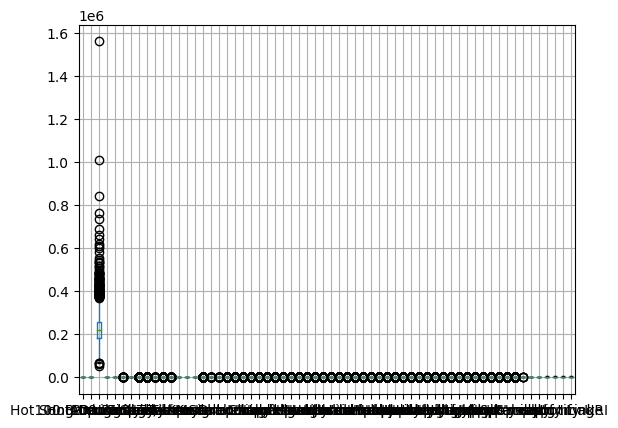

In [ ]:
# Visualize the data using box plots
df.boxplot()

# Calculate summary statistics
summary_stats = df.describe()

# Calculate Z-scores for each column
z_scores = (df - df.mean()) / df.std()

# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using Z-score or IQR methods
zscore_threshold = 2  # Adjust the threshold as needed
iqr_multiplier = 1.5  # Adjust the multiplier as needed

# Identify outliers using Z-score
zscore_outliers = (z_scores > zscore_threshold) | (z_scores < -zscore_threshold)

# Identify outliers using IQR
iqr_outliers = (df < (Q1 - iqr_multiplier * IQR)) | (df > (Q3 + iqr_multiplier * IQR))

# Find columns with outliers
columns_with_outliers = df.columns[zscore_outliers.any() | iqr_outliers.any()]

# Print the columns with outliers
print("Columns with outliers:")
print(columns_with_outliers)

In [ ]:
for column_name in columns_with_outliers:
      # Calculate the Z-score for the column
      z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()

      # Set the Z-score threshold for outliers
      zscore_threshold = 2

      # Identify and replace outliers
      df[column_name] = np.where(np.abs(z_scores) > zscore_threshold, df[column_name].median(), df[column_name])

      # Print the modified column
      print(df[column_name])

0       2000.0
1       1999.0
2       1979.0
3       1954.0
4       2006.0
         ...  
6186    1991.0
6187    2006.0
6188    2006.0
6189    2008.0
6190    1962.0
Name: Hot100 Ranking Year, Length: 6191, dtype: float64
0       229826.0
1       290600.0
2       197453.0
3       169066.0
4       251013.0
          ...   
6186    298691.0
6187    303053.0
6188    231866.0
6189    258826.0
6190    143826.0
Name: Song Length(ms), Length: 6191, dtype: float64
0       62.0
1       63.0
2       49.0
3       43.0
4       58.0
        ... 
6186    56.0
6187    71.0
6188    60.0
6189    75.0
6190    54.0
Name: Popularity, Length: 6191, dtype: float64
0       0.0200
1       0.2330
2       0.4760
3       0.1950
4       0.0149
         ...  
6186    0.0116
6187    0.1890
6188    0.2620
6189    0.0208
6190    0.3540
Name: Acousticness, Length: 6191, dtype: float64
0       0.478
1       0.588
2       0.313
3       0.503
4       0.843
        ...  
6186    0.875
6187    0.787
6188    0.684
6189    0.

In [ ]:
print(X) #all data

      Hot100 Ranking Year  Hot100 Rank  Song Length(ms)  Acousticness  \
0                0.710526     0.434343         0.117950      0.020097   
1                0.697368     0.424242         0.158216      0.234168   
2                0.434211     0.858586         0.096502      0.478390   
3                0.105263     0.191919         0.077694      0.977889   
4                0.789474     0.494949         0.131987      0.014971   
...                   ...          ...              ...           ...   
6186             0.592105     0.878788         0.163576      0.011655   
6187             0.789474     0.070707         0.166466      0.189947   
6188             0.789474     0.424242         0.119302      0.263314   
6189             0.815789     0.060606         0.137164      0.020901   
6190             0.210526     0.747475         0.060971      0.355777   

      Danceability    Energy  Instrumentalness  Liveness  Loudness  \
0         0.483806  0.735025          0.000099  0.106

In [ ]:
most_frequent_value = df['day'].mode().values[0]
for i in range(len(X['day'])):
  if X.loc[i,'day'] == 0:
    X.loc[i,'day'] = most_frequent_value
print(X['day'])

0       0.966667
1       1.000000
2       1.000000
3       1.000000
4       0.500000
          ...   
6186    0.266667
6187    1.000000
6188    0.666667
6189    0.066667
6190    1.000000
Name: day, Length: 6191, dtype: float64


In [ ]:
most_frequent_value = df['month'].mode().values[0]
for i in range(len(X['month'])):
  if X.loc[i,'month'] == 0:
    X.loc[i,'month'] = most_frequent_value
print(X['month'])

0       1.000000
1       0.636364
2       1.000000
3       1.000000
4       0.636364
          ...   
6186    0.272727
6187    1.000000
6188    0.909091
6189    0.545455
6190    1.000000
Name: month, Length: 6191, dtype: float64


In [ ]:
print(y) # the target

0       62
1       63
2       49
3       43
4        0
        ..
6186    56
6187    71
6188    60
6189    75
6190    54
Name: Popularity, Length: 6191, dtype: int64


In [ ]:
X.drop(['album','spotify Link', 'song Image', 'spotify URI'], axis=1, inplace=True)
X.head()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,...,'hip pop','r&b','disco','pop','gangster rap','rockabilly','pop rap',year,month,day
0,0.710526,0.434343,0.117950,0.020097,0.483806,0.735025,0.000099,0.106186,0.829494,0.040285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.822581,1.000000,0.966667
1,0.697368,0.424242,0.158216,0.234168,0.595142,0.517766,0.000000,0.231959,0.852988,0.042042,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.798387,0.636364,1.000000
2,0.434211,0.858586,0.096502,0.478390,0.316802,0.596954,0.000026,0.523711,0.808188,0.039188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.645161,1.000000,1.000000
3,0.105263,0.191919,0.077694,0.977889,0.509109,0.047716,0.000000,0.090722,0.586266,0.054555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.370968,1.000000,1.000000
4,0.789474,0.494949,0.131987,0.014971,0.853239,0.341117,0.001317,0.239175,0.733764,0.059824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.903226,0.636364,0.500000


In [ ]:
#Feature Engineering
# Determine the name of the new column
new_Energy1 = 'NewEnergy'
# Iterate over each row in the dataset
for index, row in X.iterrows():
    # Access the values of the three columns to sum
    column1_value = row['Energy']
    column2_value = row['Loudness']
    column3_value = row['Danceability']
    column4_value = row['Liveness']
    # Calculate the sum of the three values
    sum_value1 = (column1_value + column2_value + column3_value + column4_value) / 4
    # Assign the sum to the new column for that row
    X.at[index, new_Energy1] = sum_value1
X.drop(['Energy','Loudness', 'Danceability', 'Liveness'], axis=1, inplace=True)
# Determine the name of the New Rock column
new_Rock = 'NewRock'
# Iterate over each row in the dataset
for index, row in X.iterrows():
    # Access the values of the three columns to sum
    column1_value1 = row["'rock'"]
    column2_value1 = row["'soft rock'"]
    column3_value1 = row["'hard rock'"]
    column4_value1 = row["'classic rock'"]
    column5_value1 = row["'rock-and-roll'"]
    column6_value1 = row["'folk rock'"]
    column7_value1 = row["'album rock'"]
    column8_value1 = row["'heartland rock'"]
    column9_value1 = row["'country rock'"]
    # Calculate the sum of the three values
    sum_value2 = (column1_value1 + column2_value1 + column3_value1 + column4_value1 + column5_value1 + column6_value1 + column7_value1 + column8_value1 + column9_value1) / 9
    # Assign the sum to the new column for that row
    X.at[index, new_Rock] = sum_value2
X.drop(["'rock'","'soft rock'", "'hard rock'", "'classic rock'","'rock-and-roll'","'folk rock'","'album rock'","'heartland rock'","'rockabilly'","'country rock'"], axis=1, inplace=True)

# Determine the name of the New Pop column
new_Pop = 'NewPop'

# Iterate over each row in the dataset
for index, row in X.iterrows():
    # Access the values of the three columns to sum
    column1_value2 = row["'pop'"]
    column2_value2 = row["'new wave pop'"]
    column3_value2 = row["'dance pop'"]
    column4_value2 = row["'hip pop'"]
    column5_value2 = row["'bubblegum pop'"]
    # Calculate the sum of the three values
    sum_value3 = (column1_value2 + column2_value2 + column3_value2 + column4_value2 + column5_value2) / 5

    # Assign the sum to the new column for that row
    X.at[index, new_Pop] = sum_value3
X.drop(["'pop'","'new wave pop'","'dance pop'","'hip pop'","'bubblegum pop'"], axis=1, inplace=True)

# Determine the name of the New Rap column
new_Rap = 'NewRap'

# Iterate over each row in the dataset
for index, row in X.iterrows():
    # Access the values of the three columns to sum
    column1_value3 = row["'rap'"]
    column2_value3 = row["'trap'"]
    column3_value3 = row["'pop rap'"]
    # Calculate the sum of the three values
    sum_value4 = (column1_value3 + column2_value3 + column3_value3) / 3
    # Assign the sum to the new column for that row
    X.at[index, new_Rap] = sum_value4
X.drop(["'pop rap'","'trap'","'rap'"], axis=1, inplace=True)

# Determine the name of the New Hip Hop column
new_HipHop = 'NewHipHop'
# Iterate over each row in the dataset
for index, row in X.iterrows():
    # Access the values of the three columns to sum
    column1_value4 = row["'hip hop'"]
    column2_value4 = row["'southern hip hop'"]
    column3_value4 = row["'disco'"]
    # Calculate the sum of the three values
    sum_value6 = (column1_value4 + column2_value4 + column3_value4) / 3
    # Assign the sum to the new column for that row
    X.at[index, new_HipHop] = sum_value6
X.drop(["'hip hop'","'southern hip hop'","'disco'"], axis=1, inplace=True)

# Determine the name of the New Temp column
new_Temp = 'NewTemp'
# Iterate over each row in the dataset
for index, row in X.iterrows():
    # Access the values of the three columns to sum
    column1_value5 = row["Tempo"]
    column2_value5 = row["Valence"]
    column3_value5 = row["Key"]
    # Calculate the sum of the three values
    sum_value7 = (column1_value5 + column2_value5 + column3_value5) / 3

    # Assign the sum to the new column for that row
    X.at[index, new_Temp] = sum_value7
X.drop(["Tempo","Valence","Key"], axis=1, inplace=True)

In [ ]:
X.head()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Instrumentalness,Speechiness,Mode,Time Signature,'The Karaoke Channel','Drake',...,'gangster rap',year,month,day,NewEnergy,NewRock,NewPop,NewRap,NewHipHop,NewTemp
0,0.710526,0.434343,0.117950,0.020097,0.000099,0.040285,1.0,0.8,0.0,0.0,...,0.0,0.822581,1.000000,0.966667,0.538628,0.0,0.0,0.0,0.0,0.609315
1,0.697368,0.424242,0.158216,0.234168,0.000000,0.042042,0.0,0.8,0.0,0.0,...,0.0,0.798387,0.636364,1.000000,0.549464,0.0,0.2,0.0,0.0,0.563831
2,0.434211,0.858586,0.096502,0.478390,0.000026,0.039188,1.0,0.8,0.0,0.0,...,0.0,0.645161,1.000000,1.000000,0.561414,0.0,0.2,0.0,0.0,0.628305
3,0.105263,0.191919,0.077694,0.977889,0.000000,0.054555,1.0,0.8,0.0,0.0,...,0.0,0.370968,1.000000,1.000000,0.308453,0.0,0.0,0.0,0.0,0.493956
4,0.789474,0.494949,0.131987,0.014971,0.001317,0.059824,0.0,0.8,0.0,0.0,...,0.0,0.903226,0.636364,0.500000,0.541824,0.0,0.0,0.0,0.0,0.547515


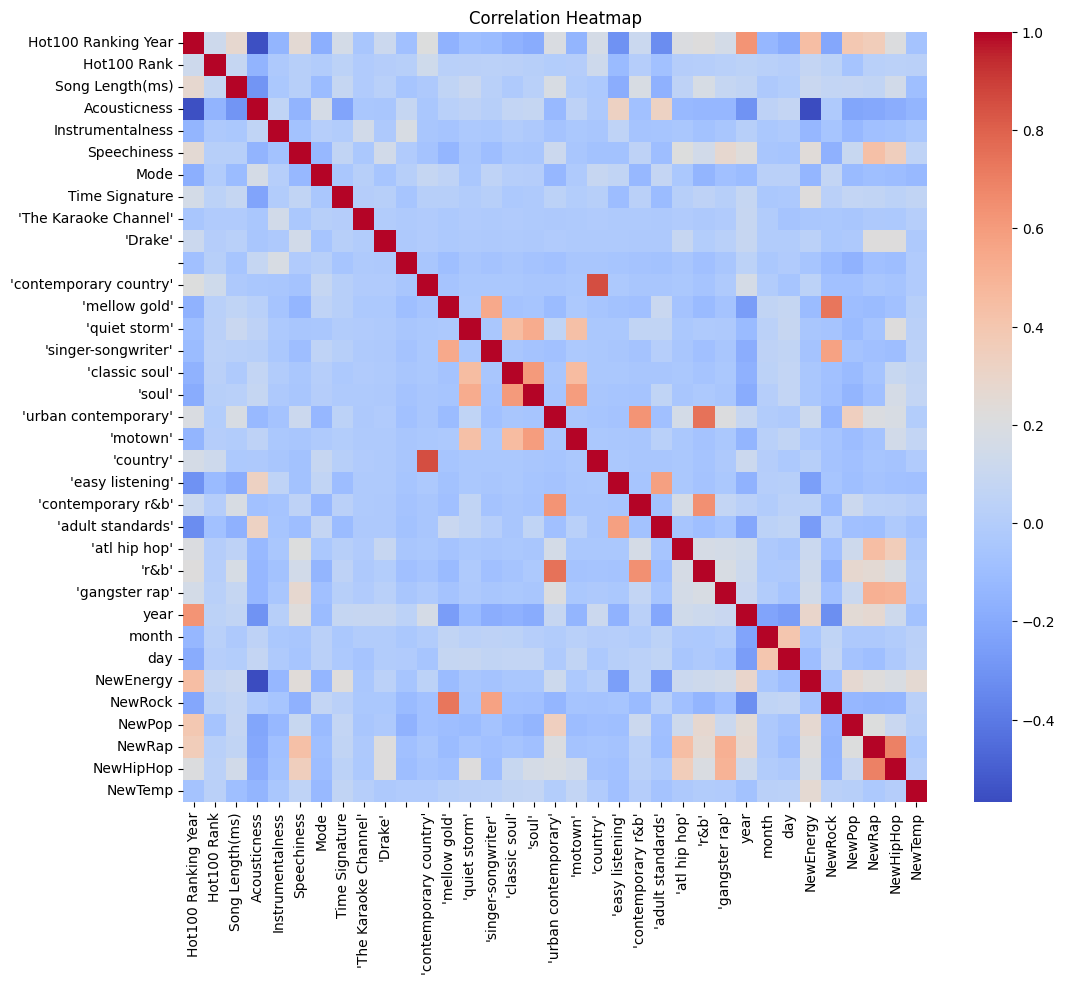

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

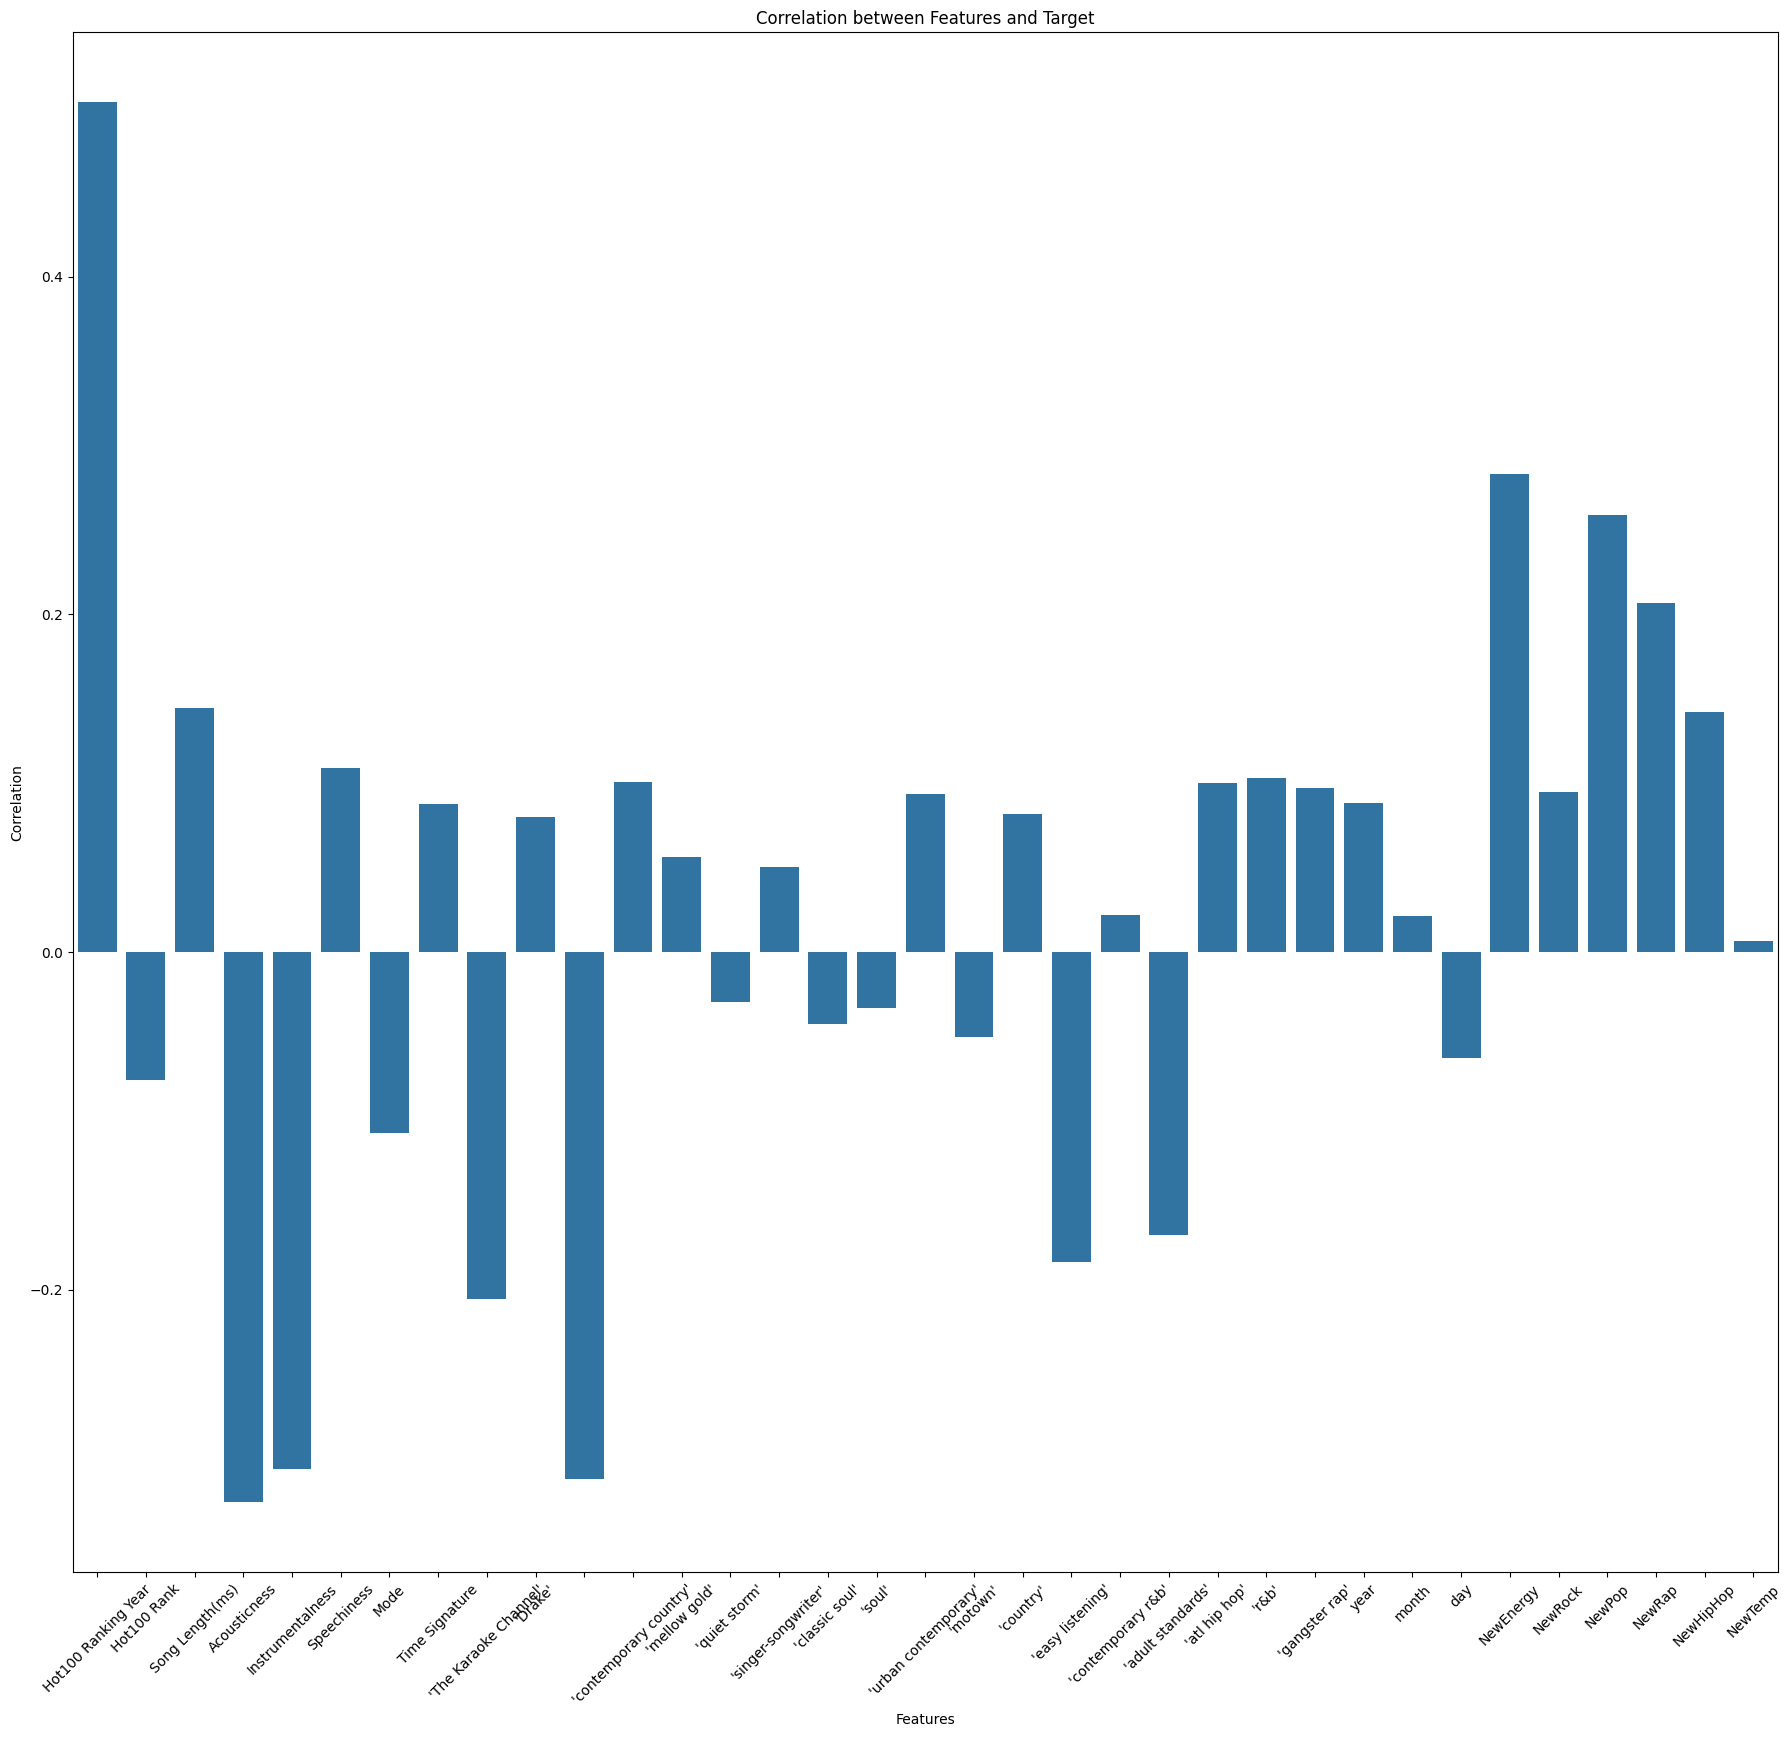

In [ ]:
correlation_matrix = pd.concat([X, y], axis=1).corr()
target_correlations = correlation_matrix['Popularity'].drop('Popularity')
plt.figure(figsize=(22, 20))
sns.barplot(x=target_correlations.index, y=target_correlations.values)
plt.xticks(rotation=45)
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.title('Correlation between Features and Target')
plt.show()

In [ ]:
#Anova Feature selection
from sklearn.feature_selection import f_classif, SelectKBest
# Encode string columns
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

# Separate features and target
X1 = df.drop('Popularity', axis=1)
y = df['Popularity']

# Perform ANOVA feature selection
selector = SelectKBest(f_classif, k=15)
X1_new = selector.fit_transform(X, y)

# Print the selected features
print('Selected features:')
for i in range(len(selector.get_support())):
    if selector.get_support()[i]:
        print(X.columns[i])

Selected features:
Hot100 Ranking Year
Hot100 Rank
Song Length(ms)
Acousticness
Instrumentalness
'The Karaoke Channel'

'easy listening'
'adult standards'
year
month
day
NewEnergy
NewPop
NewRap


In [ ]:
#Kendall's Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Separate features and target
X2 = df.drop('Popularity', axis=1)
y = df['Popularity']

# Apply feature selection using Kendall's method
selector = SelectKBest(f_regression, k=15)
X2_new = selector.fit_transform(X, y)

# Print the selected features
print('Selected features:')
for i in range(len(selector.get_support())):
    if selector.get_support()[i]:
        print(X.columns[i])

Selected features:
Hot100 Ranking Year
Hot100 Rank
Song Length(ms)
Acousticness
Instrumentalness
Mode

'easy listening'
'adult standards'
year
day
NewEnergy
NewPop
NewRap
NewHipHop


In [ ]:
X_train = X[["Hot100 Ranking Year","'soul'","'mellow gold'","'contemporary r&b'","'adult standards'","'easy listening'","Hot100 Rank","Acousticness","'The Karaoke Channel'","Instrumentalness","NewEnergy","NewRock","NewPop","NewRap","NewHipHop","Speechiness","year","month","day"]] #Feature Selection => 3 Features
X_test = X[["Hot100 Ranking Year","'soul'","'mellow gold'","'contemporary r&b'","'adult standards'","'easy listening'","Hot100 Rank","Acousticness","'The Karaoke Channel'","Instrumentalness","NewEnergy","NewRock","NewPop","NewRap","NewHipHop","Speechiness","year","month","day"]]
Y = df['Popularity'].values

In [ ]:
# 80 % Train , 20 % Test
X_train, X_test, y_train, y_test = train_test_split(X_train, Y, test_size = 0.223, shuffle = True,random_state = 45)

In [ ]:
# Models Evaluation

# Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict on test data
y_pred = reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)

# Calculate Accuracy
accuracy = reg.score(X_test, y_test)
print("Linear Regression Accuracy:", accuracy * 100 ,'%')

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

# Create a polynomial features object with degree 2
poly_features = PolynomialFeatures(degree=2)

# Transform the training and testing data
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train a linear regression model on the transformed data
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on test data
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Polynomial Regression MSE:", mse_poly)

# Calculate Accuracy
accuracy_poly = poly_model.score(X_test_poly, y_test)
print("Polynomial Regression Accuracy:", accuracy_poly * 100 ,'%')

from sklearn.svm import SVR
# Create a SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=1, epsilon=1)

# Train the model
svr_model.fit(X_train, y_train)

# Predict on test data
y_pred_svr = svr_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("SVR Regression MSE:", mse_svr)

# Calculate Accuracy
accuracy_svr = svr_model.score(X_test, y_test)
print("SVR Regression Accuracy:", accuracy_svr * 100,'%')


# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)

# Calculate Accuracy
accuracy_rf = rf_model.score(X_test, y_test)
print("Random Forest Regression Accuracy:", accuracy_rf * 100 ,'%')

# Create a XGBoost Regressor model
xgb_model = XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost Regression MSE:", mse_xgb)

# Calculate Accuracy
accuracy_xgb = xgb_model.score(X_test, y_test)
print("XGBoost Regression Accuracy:", accuracy_xgb * 100,'%')

Linear Regression MSE: 139.04611385603636
Linear Regression Accuracy: 49.25471800384622 %
Polynomial Regression MSE: 135.4908868657553
Polynomial Regression Accuracy: 50.55220839159587 %
SVR Regression MSE: 133.3559569786583
SVR Regression Accuracy: 51.331357237675256 %
Random Forest Regression MSE: 124.83002634162041
Random Forest Regression Accuracy: 54.44292031885627 %
XGBoost Regression MSE: 122.04745261317034
XGBoost Regression Accuracy: 55.45842866072539 %
